In [1]:
import numpy as np
import pandas as pd
import os, glob, tarfile
import matplotlib.pyplot as plt
import tensorflow as tf
import PIL
from tensorflow.keras.utils import load_img, img_to_array, array_to_img
from tensorflow.keras import layers, models, callbacks, applications

In [2]:
with tarfile.open("102flowers.tgz", "r:gz") as t:
    # extracting file
    t.extractall('Data')
    print(t.getnames())

['jpg', 'jpg/image_00009.jpg', 'jpg/image_01701.jpg', 'jpg/image_01890.jpg', 'jpg/image_00623.jpg', 'jpg/image_03604.jpg', 'jpg/image_00190.jpg', 'jpg/image_02534.jpg', 'jpg/image_01087.jpg', 'jpg/image_07599.jpg', 'jpg/image_02407.jpg', 'jpg/image_04357.jpg', 'jpg/image_00094.jpg', 'jpg/image_03564.jpg', 'jpg/image_03988.jpg', 'jpg/image_03558.jpg', 'jpg/image_06930.jpg', 'jpg/image_04118.jpg', 'jpg/image_00882.jpg', 'jpg/image_07247.jpg', 'jpg/image_05384.jpg', 'jpg/image_06602.jpg', 'jpg/image_05924.jpg', 'jpg/image_04827.jpg', 'jpg/image_06629.jpg', 'jpg/image_04726.jpg', 'jpg/image_07200.jpg', 'jpg/image_01832.jpg', 'jpg/image_00390.jpg', 'jpg/image_04449.jpg', 'jpg/image_06970.jpg', 'jpg/image_03975.jpg', 'jpg/image_06230.jpg', 'jpg/image_01821.jpg', 'jpg/image_03326.jpg', 'jpg/image_00902.jpg', 'jpg/image_02102.jpg', 'jpg/image_04985.jpg', 'jpg/image_03433.jpg', 'jpg/image_07634.jpg', 'jpg/image_06699.jpg', 'jpg/image_02496.jpg', 'jpg/image_00373.jpg', 'jpg/image_02290.jpg', 'jp

In [3]:
from scipy.io import loadmat
imagelabels = loadmat('imagelabels.mat')
imagelabels

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Thu Feb 19 15:43:33 2009',
 '__version__': '1.0',
 '__globals__': [],
 'labels': array([[77, 77, 77, ..., 62, 62, 62]], dtype=uint8)}

In [4]:
imagelabels['labels'].shape

(1, 8189)

In [5]:
np.unique(imagelabels['labels'])

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102], dtype=uint8)

In [6]:
# Getting list of img file paths (no folders)
img_files = glob.glob('Data'+"/**/*")
len(img_files)

8189

In [7]:
# Preview an example image (at full size)
img_loaded = load_img(img_files[0])
img_data = img_to_array(img_loaded)
img_data.shape

(500, 591, 3)

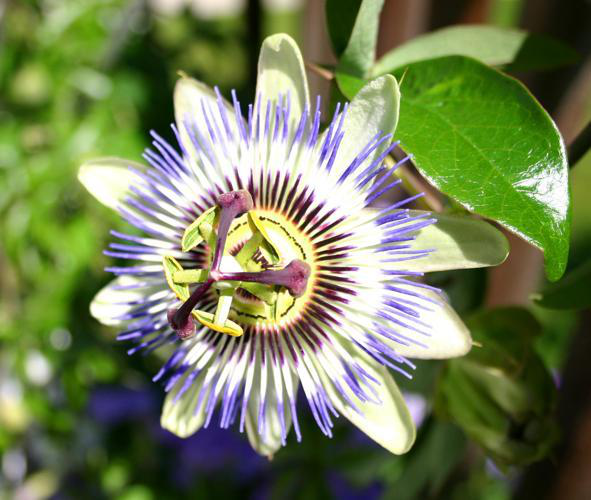

In [8]:
# Data can be converted back to image
array_to_img(img_data)

In [10]:
# Organize images into their corresponding named folders
source = 'Data/jpg'
allfiles = os.listdir(source)

# iterate on all files to move them to destination folder
for i, f in enumerate(allfiles):
    destination = 'Data/' + str(imagelabels['labels'].flatten()[i])
    os.makedirs(destination, exist_ok=True)
    src_path = os.path.join(source, f)
    dst_path = os.path.join(destination, f)
    os.rename(src_path, dst_path)

os.rmdir(source)

# Now, we can split the dataset into training, validation, and test sets.

In [2]:
data_dir = "Data/"
# Gettting the list of folders from data dir
subfolders = os.listdir(data_dir)
np.array(subfolders)

array(['1', '10', '100', '101', '102', '11', '12', '13', '14', '15', '16',
       '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26',
       '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46',
       '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66',
       '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76',
       '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86',
       '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96',
       '97', '98', '99'], dtype='<U3')

In [3]:
# Getting list of img file paths (no folders)
img_files = glob.glob(data_dir+"**/*")
len(img_files)

8189

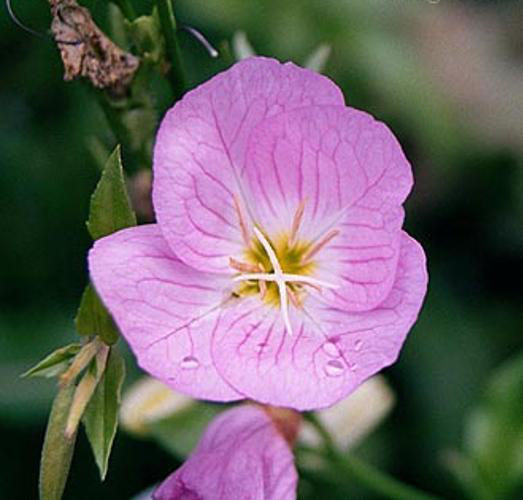

In [4]:
load_img(img_files[0])

In [5]:
# Set the seed for NumPy
np.random.seed(42)
# Set the seed for TensorFlow
tf.random.set_seed(42)

# Saving image params as vars for reuse
batch_size = 32
img_height = 128
img_width = 128

In [6]:
# make the dataset from the main folder of images
ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
    shuffle=True,
    label_mode='categorical',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Determine number of batches in dataset
ds_size = len(ds)
ds_size

Found 8189 files belonging to 102 classes.


256

In [7]:
# Saving the class names and lookup dict
modified_names = ['flower'+ element for element in ds.class_names]
class_dict = dict(zip(range(len(subfolders)), modified_names))
class_dict

{0: 'flower1',
 1: 'flower10',
 2: 'flower100',
 3: 'flower101',
 4: 'flower102',
 5: 'flower11',
 6: 'flower12',
 7: 'flower13',
 8: 'flower14',
 9: 'flower15',
 10: 'flower16',
 11: 'flower17',
 12: 'flower18',
 13: 'flower19',
 14: 'flower2',
 15: 'flower20',
 16: 'flower21',
 17: 'flower22',
 18: 'flower23',
 19: 'flower24',
 20: 'flower25',
 21: 'flower26',
 22: 'flower27',
 23: 'flower28',
 24: 'flower29',
 25: 'flower3',
 26: 'flower30',
 27: 'flower31',
 28: 'flower32',
 29: 'flower33',
 30: 'flower34',
 31: 'flower35',
 32: 'flower36',
 33: 'flower37',
 34: 'flower38',
 35: 'flower39',
 36: 'flower4',
 37: 'flower40',
 38: 'flower41',
 39: 'flower42',
 40: 'flower43',
 41: 'flower44',
 42: 'flower45',
 43: 'flower46',
 44: 'flower47',
 45: 'flower48',
 46: 'flower49',
 47: 'flower5',
 48: 'flower50',
 49: 'flower51',
 50: 'flower52',
 51: 'flower53',
 52: 'flower54',
 53: 'flower55',
 54: 'flower56',
 55: 'flower57',
 56: 'flower58',
 57: 'flower59',
 58: 'flower6',
 59: 'flow

In [8]:
# taking a sample batch to see batch shape
example_batch_imgs, example_batch_y= ds.take(1).get_single_element()
example_batch_imgs.shape

TensorShape([32, 128, 128, 3])

In [9]:
# Preview y for first 5 of first batch
print(example_batch_y[0:5])
# simplify labels to number
np.where(example_batch_y[0:5] == 1)

tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

(array([0, 1, 2, 3, 4], dtype=int64), array([73, 50, 74, 58, 49], dtype=int64))

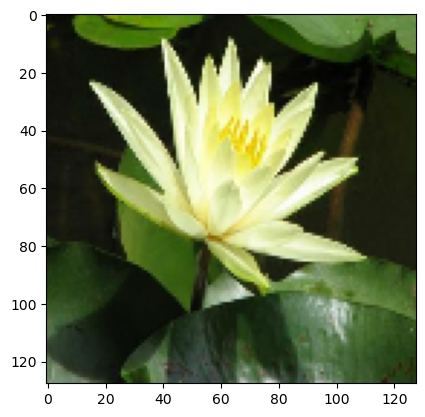

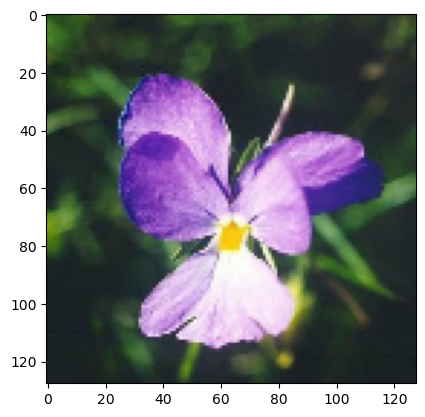

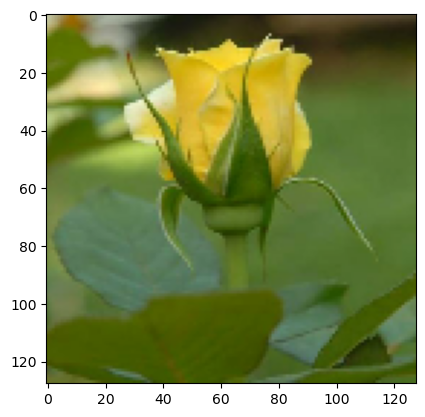

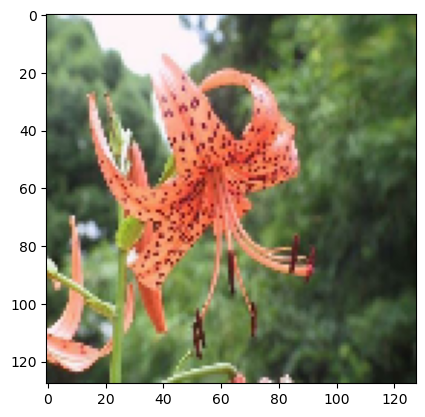

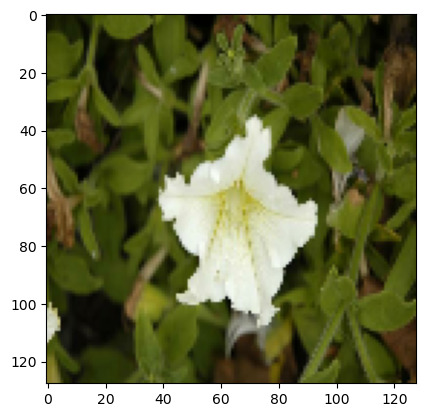

In [10]:
for i in range(5):
  flower = array_to_img(example_batch_imgs[i])
  plt.imshow(flower)
  plt.show()

In [11]:
# Individual image shape
input_shape = example_batch_imgs[0].shape
input_shape

TensorShape([128, 128, 3])

In [12]:
# Saving parameters for reuse
num_classes = len(subfolders)
input_shape = [*input_shape]

# slice out 70% of batches
train_ds = ds.take(int(ds_size*0.7))
# Confirm the length of the training set
len(train_ds)

179

In [13]:
# Skipover the training batches
test_ds = ds.skip(int(ds_size*0.7))
# Take 20% for validation batches and 10% for test batches
val_ds = test_ds.take(int(ds_size*0.2))
test_ds = test_ds.skip(int(ds_size*0.2))
# Confirm the length of the testing data
len(test_ds)

26

In [14]:
# Use autotune to automatically determine best buffer sizes
AUTOTUNE = tf.data.AUTOTUNE
# Make buffer size the same as the total number of batches
buffer_size = ds_size
# Use autotune to automatically determine best buffer sizes
AUTOTUNE = tf.data.AUTOTUNE

# optimize the efficiency
train_ds = train_ds.cache().shuffle(buffer_size= buffer_size, seed=42).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Next, we can explore pre-trained models in Keras, such as ResNet50.

In [15]:
# Download the model base
ResNet50_base = applications.ResNet50(include_top=False, input_shape=input_shape)
# Make it not-trainable
ResNet50_base.trainable=False

# add preprocessing lambda layer
lambda_layer = layers.Lambda(applications.resnet.preprocess_input, name='preprocess_input')

In [16]:
tf.keras.backend.clear_session()
def build_model():
    model = models.Sequential()

    # Use input layer (lambda layer will handle rescaling).
    model.add(layers.Input(shape=input_shape))
    ## Adding preprocessing lamabda layer
    model.add(lambda_layer)

    # Add pretrained base
    model.add(ResNet50_base)

    model.add(layers.GlobalAveragePooling2D()),
    model.add(layers.Dense(256, activation='relu')),
    model.add(layers.Dropout(0.2)),

    # Output layer
    model.add(layers.Dense(num_classes, activation="softmax"))

    model.compile(
        optimizer='adam', loss='categorical_crossentropy',
        metrics=["accuracy"]
    )
    model.summary()
    return model

# Build the model
model_resnet = build_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 preprocess_input (Lambda)   (None, 128, 128, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 102)               26214     
                                                        

In [17]:
history = model_resnet.fit(
                   train_ds, validation_data=val_ds, epochs=40,
                    callbacks= callbacks.EarlyStopping(patience=3, monitor='val_accuracy')
                      )

Epoch 1/40
179/179 [==============================] - 247s 1s/step - loss: 2.2395 - accuracy: 0.4920 - val_loss: 0.9892 - val_accuracy: 0.7390
Epoch 2/40
179/179 [==============================] - 224s 1s/step - loss: 0.7561 - accuracy: 0.7881 - val_loss: 0.6800 - val_accuracy: 0.8070
Epoch 3/40
179/179 [==============================] - 221s 1s/step - loss: 0.4286 - accuracy: 0.8743 - val_loss: 0.6126 - val_accuracy: 0.8278
Epoch 4/40
179/179 [==============================] - 210s 1s/step - loss: 0.2783 - accuracy: 0.9209 - val_loss: 0.5301 - val_accuracy: 0.8493
Epoch 5/40
179/179 [==============================] - 220s 1s/step - loss: 0.2070 - accuracy: 0.9424 - val_loss: 0.5350 - val_accuracy: 0.8603
Epoch 6/40
179/179 [==============================] - 218s 1s/step - loss: 0.1425 - accuracy: 0.9600 - val_loss: 0.5101 - val_accuracy: 0.8554
Epoch 7/40
179/179 [==============================] - 219s 1s/step - loss: 0.1263 - accuracy: 0.9633 - val_loss: 0.5069 - val_accuracy: 0.8591

In [18]:
#Save the Model
folder = 'Models/'
os.makedirs(folder, exist_ok=True)
model_resnet.save(folder+'test_1.keras')

In [19]:
def get_true_pred_labels(model,ds):
    """Gets the labels and predicted probabilities from a Tensorflow model and Dataset object.
    Adapted from source: https://stackoverflow.com/questions/66386561/keras-classification-report-accuracy-is-different-between-model-predict-accurac
    """
    y_true = []
    y_pred_probs = []
    
    # Loop through the dataset as a numpy iterator
    for images, labels in ds.as_numpy_iterator():
        
        # Get prediction with batch_size=1
        y_probs = model.predict(images, batch_size=1, verbose=0)
        # Combine previous labels/preds with new labels/preds
        y_true.extend(labels)
        y_pred_probs.extend(y_probs)
    ## Convert the lists to arrays
    y_true = np.array(y_true)
    y_pred_probs = np.array(y_pred_probs)
    
    return y_true, y_pred_probs
    
def convert_y_to_sklearn_classes(y, verbose=False):
    # If already one-dimension
    if np.ndim(y)==1:
        if verbose:
            print("- y is 1D, using it as-is.")
        return y
        
    # If 2 dimensions with more than 1 column:
    elif y.shape[1]>1:
        if verbose:
            print("- y is 2D with >1 column. Using argmax for metrics.")   
        return np.argmax(y, axis=1)
    
    else:
        if verbose:
            print("y is 2D with 1 column. Using round for metrics.")
        return np.round(y).flatten().astype(int)

In [20]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(4,8),
                           normalize='true', cmap='Blues',
                           colorbar=False,values_format=".2f"):

    # Get the classification report
    report = classification_report(y_true, y_pred)
    
    ## Print header and report
    header = "-"*70
    print(header, f" Classification Metrics: {label}", header, sep='\n')
    print(report)
    
    ## CONFUSION MATRICES SUBPLOTS
    fig, axes = plt.subplots(nrows=2, figsize=figsize)
    
    # Create a confusion matrix  of raw counts (left subplot)
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                                            normalize=None, 
                                            cmap='gist_gray_r',# Updated cmap
                                            values_format="d", 
                                            colorbar=colorbar,
                                            ax = axes[0]);
    axes[0].set_title("Raw Counts")

    
    # Create a confusion matrix with the data with normalize argument 
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                                            normalize=normalize,
                                            cmap=cmap, 
                                            values_format=values_format, #New arg
                                            colorbar=colorbar,
                                            ax = axes[1]);
    axes[1].set_title("Normalized Confusion Matrix")
    
    # Adjust layout and show figure
    fig.tight_layout()
    plt.show()
    
    # Return dictionary of classification_report
    if output_dict==True:
        report_dict = classification_report(y_true, y_pred, output_dict=True)
        return report_dict



## PLOT_HISTORY FUNCTION
def plot_history(history,figsize=(6,8)):
    # Get a unique list of metrics 
    all_metrics = np.unique([k.replace('val_','') for k in history.history.keys()])

    # Plot each metric
    n_plots = len(all_metrics)
    fig, axes = plt.subplots(nrows=n_plots, figsize=figsize)
    axes = axes.flatten()

    # Loop through metric names add get an index for the axes
    for i, metric in enumerate(all_metrics):

        # Get the epochs and metric values
        epochs = history.epoch
        score = history.history[metric]

        # Plot the training results
        axes[i].plot(epochs, score, label=metric, marker='.')
        # Plot val results (if they exist)
        try:
            val_score = history.history[f"val_{metric}"]
            axes[i].plot(epochs, val_score, label=f"val_{metric}",marker='.')
        except:
            pass

        finally:
            axes[i].legend()
            axes[i].set(title=metric, xlabel="Epoch",ylabel=metric)

    # Adjust subplots and show
    fig.tight_layout()
    plt.show()

In [21]:
def evaluate_classification_network(model, 
                                    X_train=None, y_train=None, 
                                    X_test=None, y_test=None,
                                    history=None, history_figsize=(6,6),
                                    figsize=(6,6), normalize='true',
                                    output_dict = False,
                                    cmap_train='Blues',
                                    cmap_test="Reds",
                                    values_format=".2f", 
                                    colorbar=False):
    """Evaluates a neural network classification task using either
    separate X and y arrays or a tensorflow Dataset
    
    Data Args:
        X_train (array, or Dataset)       y_train (array, or None if using a Dataset)
        X_test (array, or Dataset)        y_test (array, or None if using a Dataset)
        """
    # Plot history, if provided
    if history is not None:
        plot_history(history, figsize=history_figsize)
    ## Adding a Print Header
    print("\n"+'='*80)
    print('- Evaluating Network...')
    print('='*80)
    ## TRAINING DATA EVALUATION
    # check if X_train was provided
    if X_train is not None:
        ## Check if X_train is a dataset
        if hasattr(X_train,'map'):
            # If it IS a Datset:
            # extract y_train and y_train_pred with helper function
            y_train, y_train_pred = get_true_pred_labels(model, X_train)
        else:
            # Get predictions for training data
            y_train_pred = model.predict(X_train)
        ## Pass both y-vars through helper compatibility function
        y_train = convert_y_to_sklearn_classes(y_train)
        y_train_pred = convert_y_to_sklearn_classes(y_train_pred)
        
        # Call the helper function to obtain regression metrics for training data
        results_train = classification_metrics(y_train, y_train_pred, 
                                         output_dict=True, figsize=figsize,
                                             colorbar=colorbar, cmap=cmap_train,
                                               values_format=values_format,
                                         label='Training Data')
        
        ## Run model.evaluate         
        print("\n- Evaluating Training Data:")
        print(model.evaluate(X_train, return_dict=True))
    
    # If no X_train, then save empty list for results_train
    else:
        results_train = []
    ## TEST DATA EVALUATION
    # check if X_test was provided
    if X_test is not None:
        ## Check if X_train is a dataset
        if hasattr(X_test,'map'):
            # If it IS a Datset:
            # extract y_train and y_train_pred with helper function
            y_test, y_test_pred = get_true_pred_labels(model, X_test)
        else:
            # Get predictions for training data
            y_test_pred = model.predict(X_test)
        ## Pass both y-vars through helper compatibility function
        y_test = convert_y_to_sklearn_classes(y_test)
        y_test_pred = convert_y_to_sklearn_classes(y_test_pred)
        
        # Call the helper function to obtain regression metrics for training data
        results_test = classification_metrics(y_test, y_test_pred, 
                                         output_dict=True, figsize=figsize,
                                             colorbar=colorbar, cmap=cmap_test,
                                              values_format=values_format,
                                         label='Test Data')
        
        ## Run model.evaluate         
        print("\n- Evaluating Test Data:")
        print(model.evaluate(X_test, return_dict=True))
      
    # If no X_test, then save empty list for results_test
    else:
        results_test = []
      
    # Store results in a dictionary
    results_dict = {'train':results_train,
                    'test': results_test}
    if output_dict == True:
        return results_dict

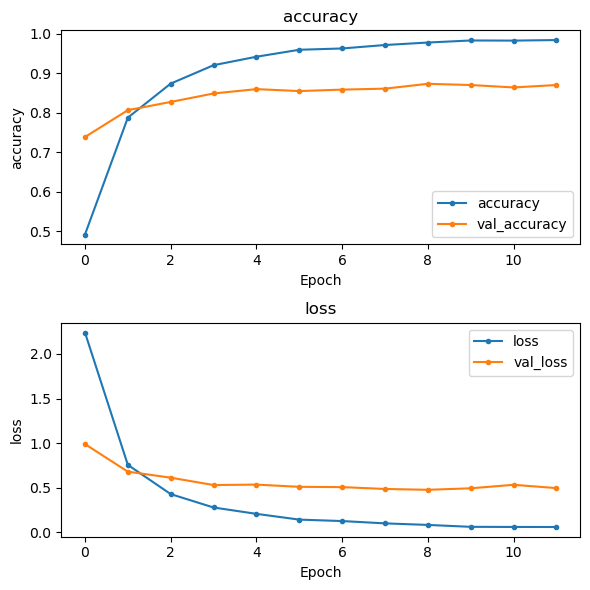


- Evaluating Network...
----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        46
           4       1.00      1.00      1.00        39
           5       1.00      1.00      1.00        58
           6       1.00      1.00      1.00        64
           7       1.00      1.00      1.00        27
           8       1.00      1.00      1.00        34
           9       1.00      1.00      1.00        34
          10       1.00      1.00      1.00        32
          11       1.00      1.00      1.00        62
          12       1.00      1.00      1.00        53
          13       1.00      1.00    

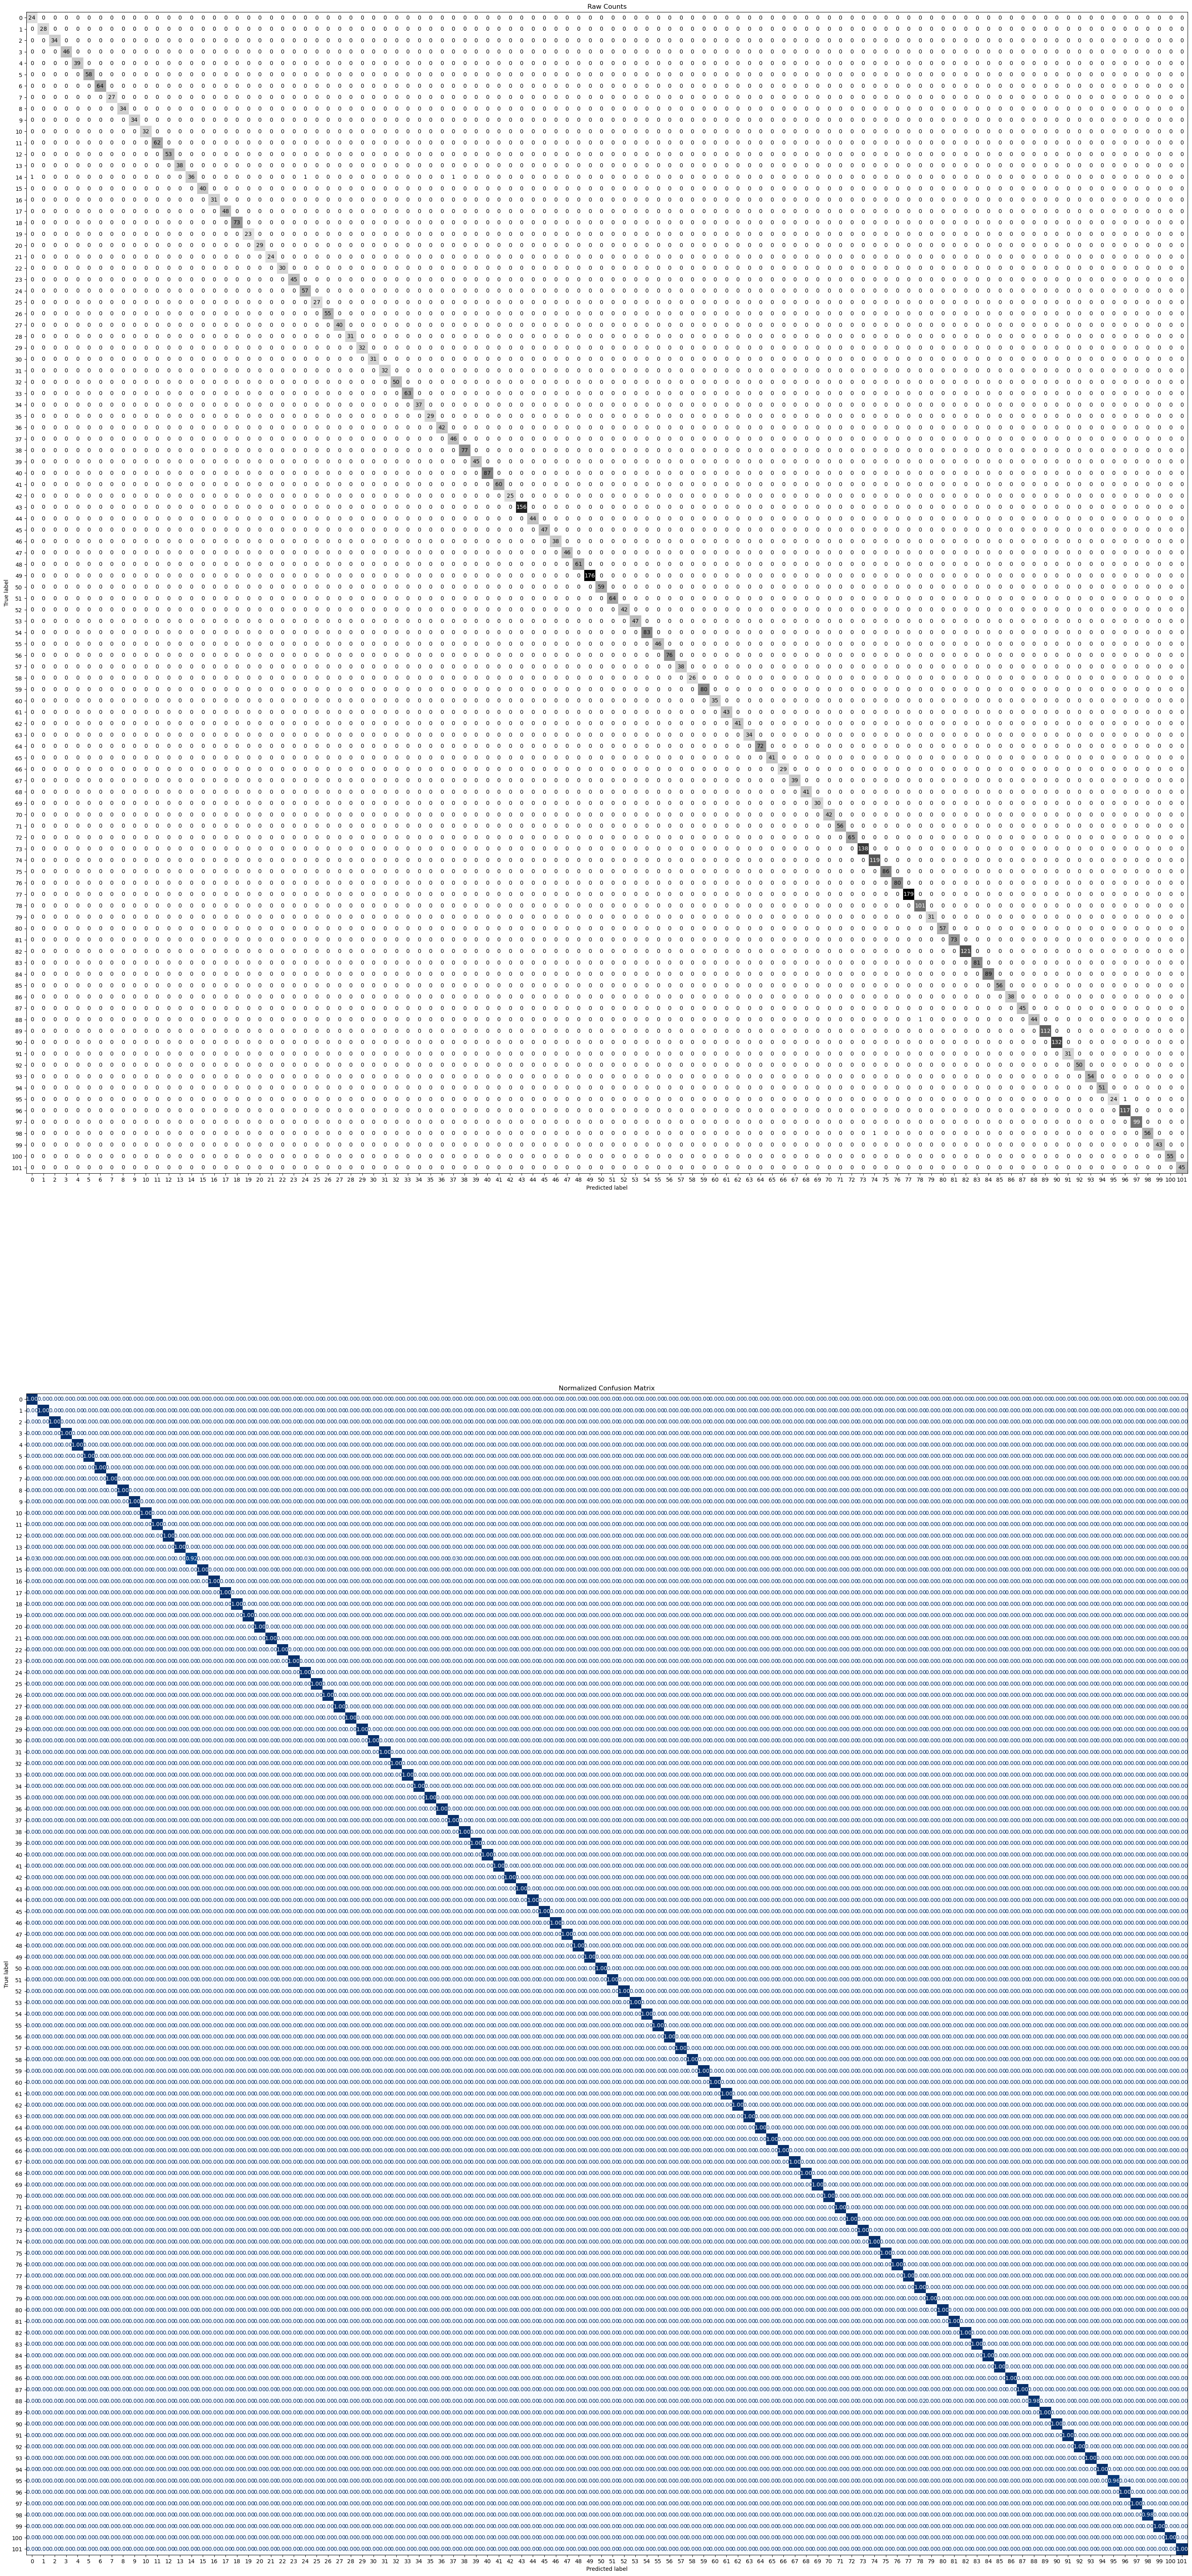


- Evaluating Training Data:
179/179 [==============================] - 179s 999ms/step - loss: 0.0114 - accuracy: 0.9990
{'loss': 0.01142692007124424, 'accuracy': 0.9989525079727173}


C:\Users\yupfj\anaconda3\envs\dojo-env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yupfj\anaconda3\envs\dojo-env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yupfj\anaconda3\envs\dojo-env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       1.00      1.00      1.00         2
           2       0.89      1.00      0.94         8
           3       1.00      1.00      1.00         2
           4       0.75      1.00      0.86         3
           5       0.75      0.67      0.71         9
           6       0.79      1.00      0.88        11
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00         6
           9       0.56      1.00      0.71         5
          10       1.00      1.00      1.00         3
          11       1.00      0.83      0.91         6
          12       0.75      0.67      0.71         9
          13       0.75      1.00      0.86         3
          14

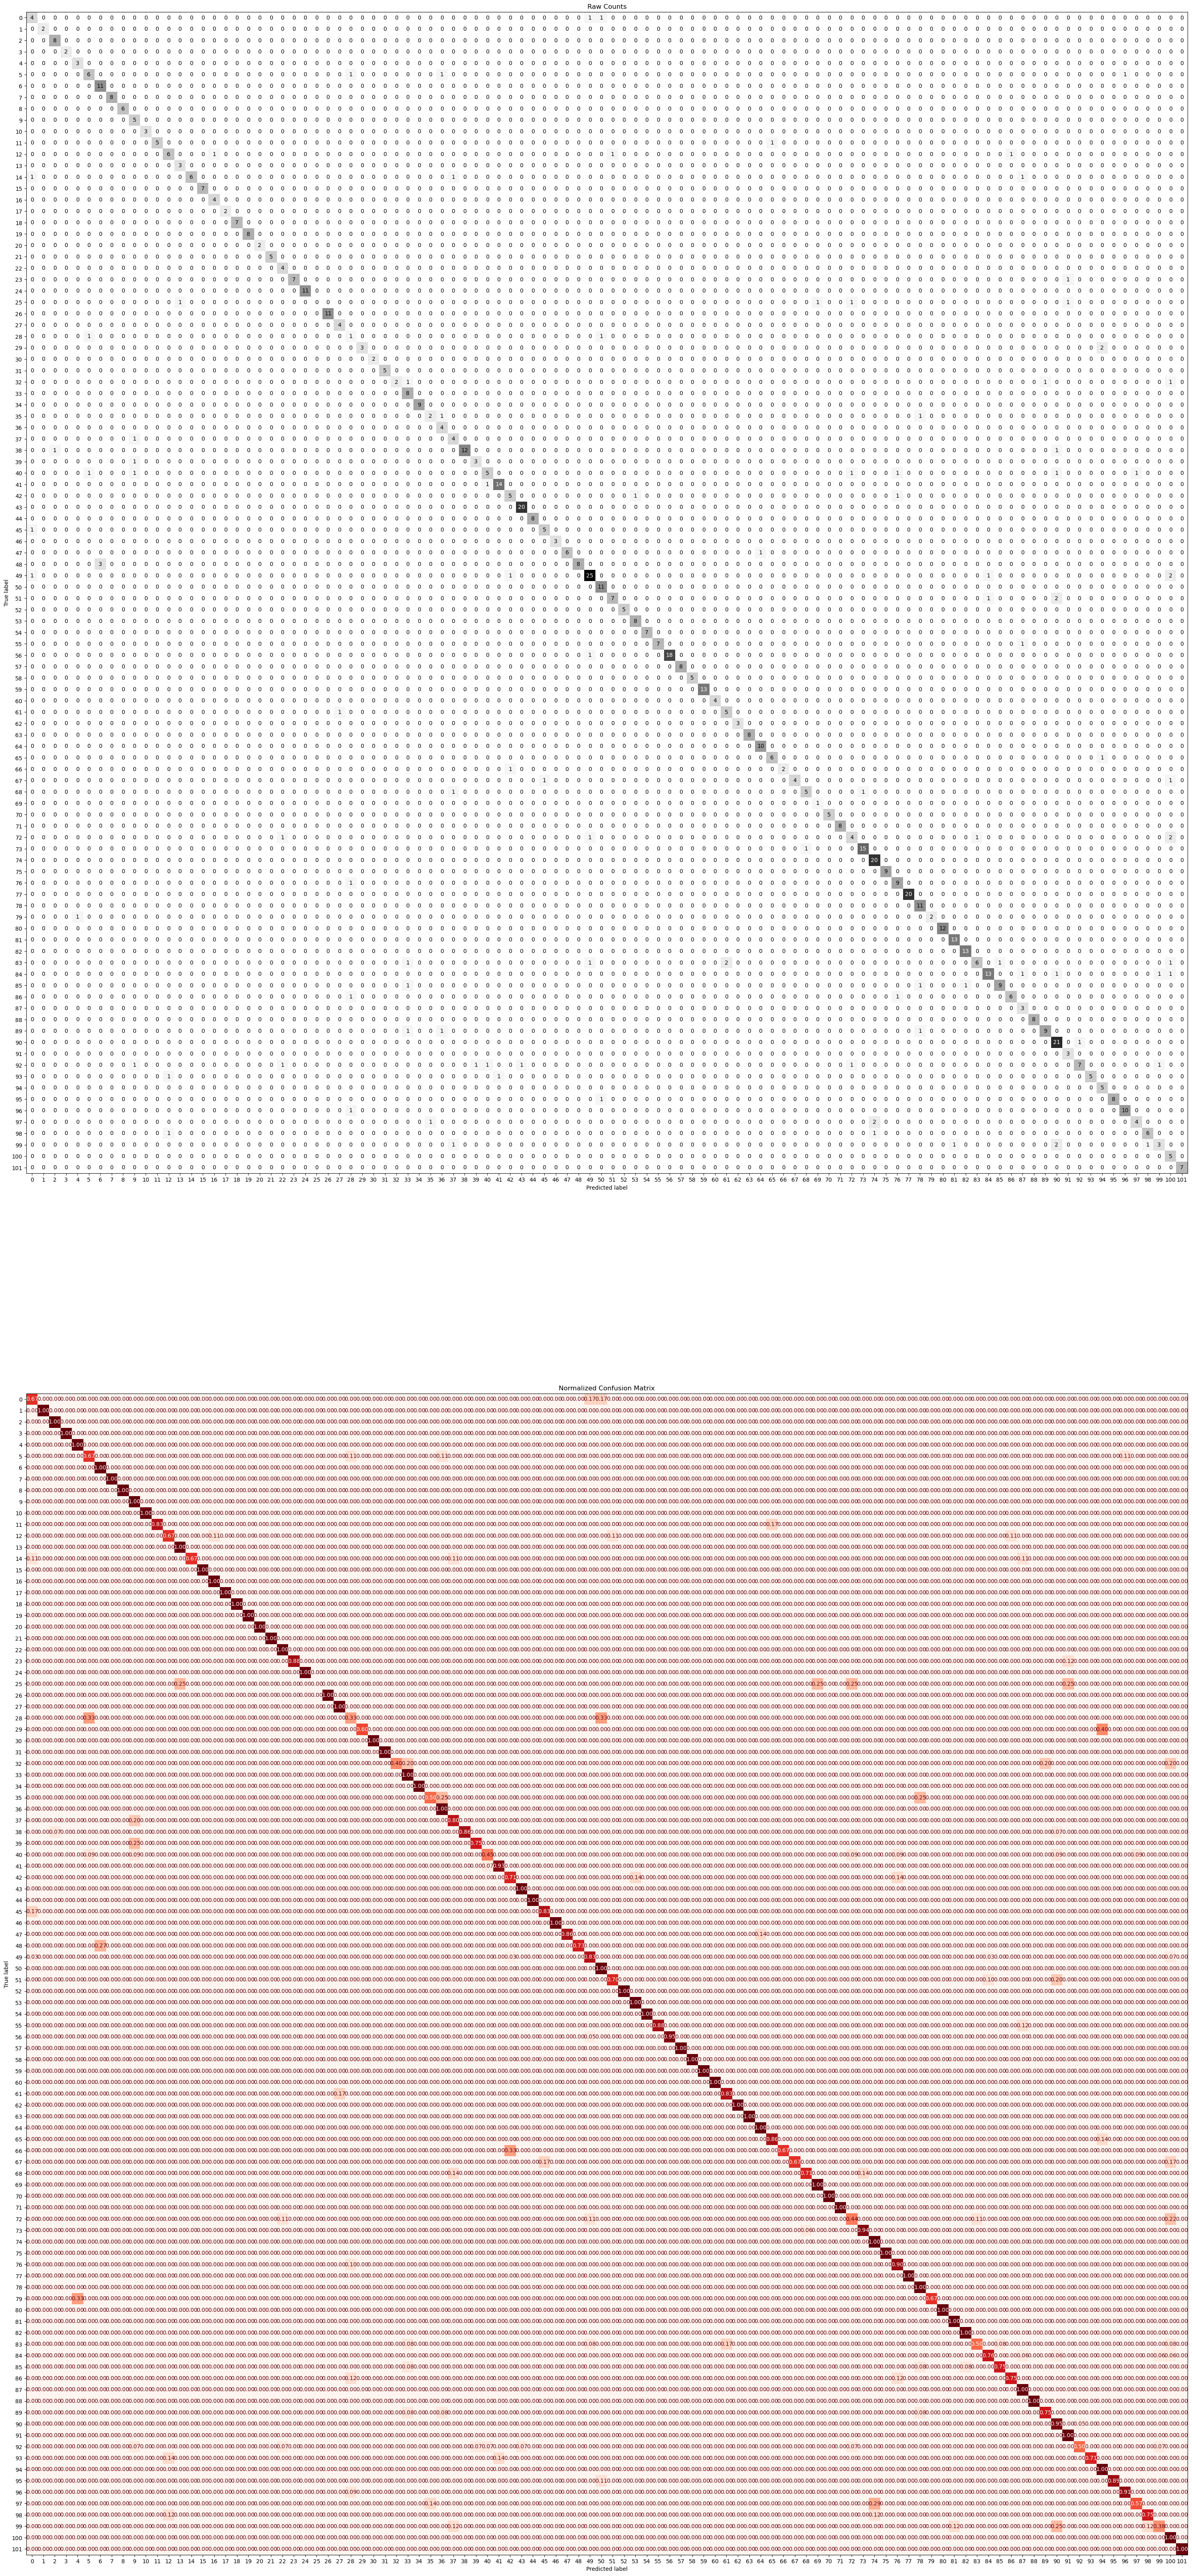

C:\Users\yupfj\anaconda3\envs\dojo-env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yupfj\anaconda3\envs\dojo-env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yupfj\anaconda3\envs\dojo-env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



- Evaluating Test Data:
26/26 [==============================] - 26s 993ms/step - loss: 0.4848 - accuracy: 0.8685
{'loss': 0.48483583331108093, 'accuracy': 0.8685162663459778}


In [23]:
# Evaluate the model using the evaluation function
evaluate_classification_network(
    model_resnet, X_train=train_ds, X_test=test_ds, history=history, figsize=(30,70));

# The base model is showing signs of overfitting, train accuracy ~1 and there is room for improvement in test accuracy ~0.87. I intend to fine-tune the Dropout layer to enhance the model.

In [33]:
import keras_tuner as kt

tf.keras.backend.clear_session()
def build_model_tune(hp):
    model = models.Sequential()

    # Use input layer (lambda layer will handle rescaling).
    model.add(layers.Input(shape=input_shape))
    ## Adding preprocessing lamabda layer
    model.add(lambda_layer)

    # Add pretrained base
    model.add(ResNet50_base)

    model.add(layers.GlobalAveragePooling2D()),
    model.add(layers.Dropout(hp.Float(name="dropout_value1", min_value=0, max_value=0.2, step=0.1))),
    model.add(layers.Dense(256, activation='relu')),
    model.add(layers.Dropout(hp.Float(name="dropout_value2", min_value=0.2, max_value=0.6, step=0.1))),

    # Output layer
    model.add(layers.Dense(num_classes, activation="softmax"))

    model.compile(
        optimizer='adam', loss='categorical_crossentropy',
        metrics=["accuracy"]
    )
    model.summary()
    return model

In [34]:
# Define the tuner
tuner_hb = kt.Hyperband(build_model_tune, objective='val_accuracy', directory='Models/KerasTuner/',
                        max_epochs=10, overwrite=True, seed=321, project_name='Rookie_tuning') 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 preprocess_input (Lambda)   (None, 128, 128, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                        

In [35]:
# Start search
tuner_hb.search(train_ds, validation_data=val_ds)

# Obtain summary of results
tuner_hb.results_summary() 

Trial 18 Complete [00h 30m 11s]
val_accuracy: 0.874387264251709

Best val_accuracy So Far: 0.875612735748291
Total elapsed time: 03h 09m 58s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in Models/KerasTuner/Rookie_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0016 summary
Hyperparameters:
dropout_value1: 0.0
dropout_value2: 0.30000000000000004
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0015
Score: 0.875612735748291

Trial 0017 summary
Hyperparameters:
dropout_value1: 0.1
dropout_value2: 0.2
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0012
Score: 0.874387264251709

Trial 0015 summary
Hyperparameters:
dropout_value1: 0.0
dropout_value2: 0.30000000000000004
tuner/epochs: 4
tuner/initial_epoch: 2
tuner/bracket: 2
tuner/round: 1
tuner/trial_id: 0007
Score: 0.8584558963775635

Trial 0012 summary
Hyperparameters:
dropout_value1: 0.1
dropout_value2: 0

In [51]:
# Define the best model
best_model = tuner_hb.get_best_models()[0];
tf.keras.backend.clear_session()
history = best_model.fit(
                   train_ds, validation_data=val_ds, epochs=40,
                    callbacks= callbacks.EarlyStopping(patience=3, monitor='val_accuracy'))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 preprocess_input (Lambda)   (None, 128, 128, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                        

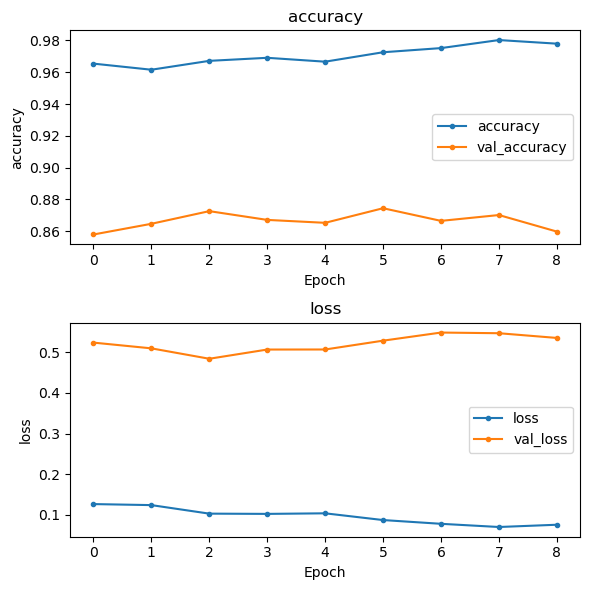


- Evaluating Network...
----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        46
           4       1.00      1.00      1.00        39
           5       1.00      1.00      1.00        58
           6       1.00      1.00      1.00        64
           7       1.00      1.00      1.00        27
           8       1.00      1.00      1.00        34
           9       1.00      1.00      1.00        34
          10       0.97      1.00      0.98        32
          11       1.00      1.00      1.00        62
          12       1.00      1.00      1.00        53
          13       1.00      1.00    

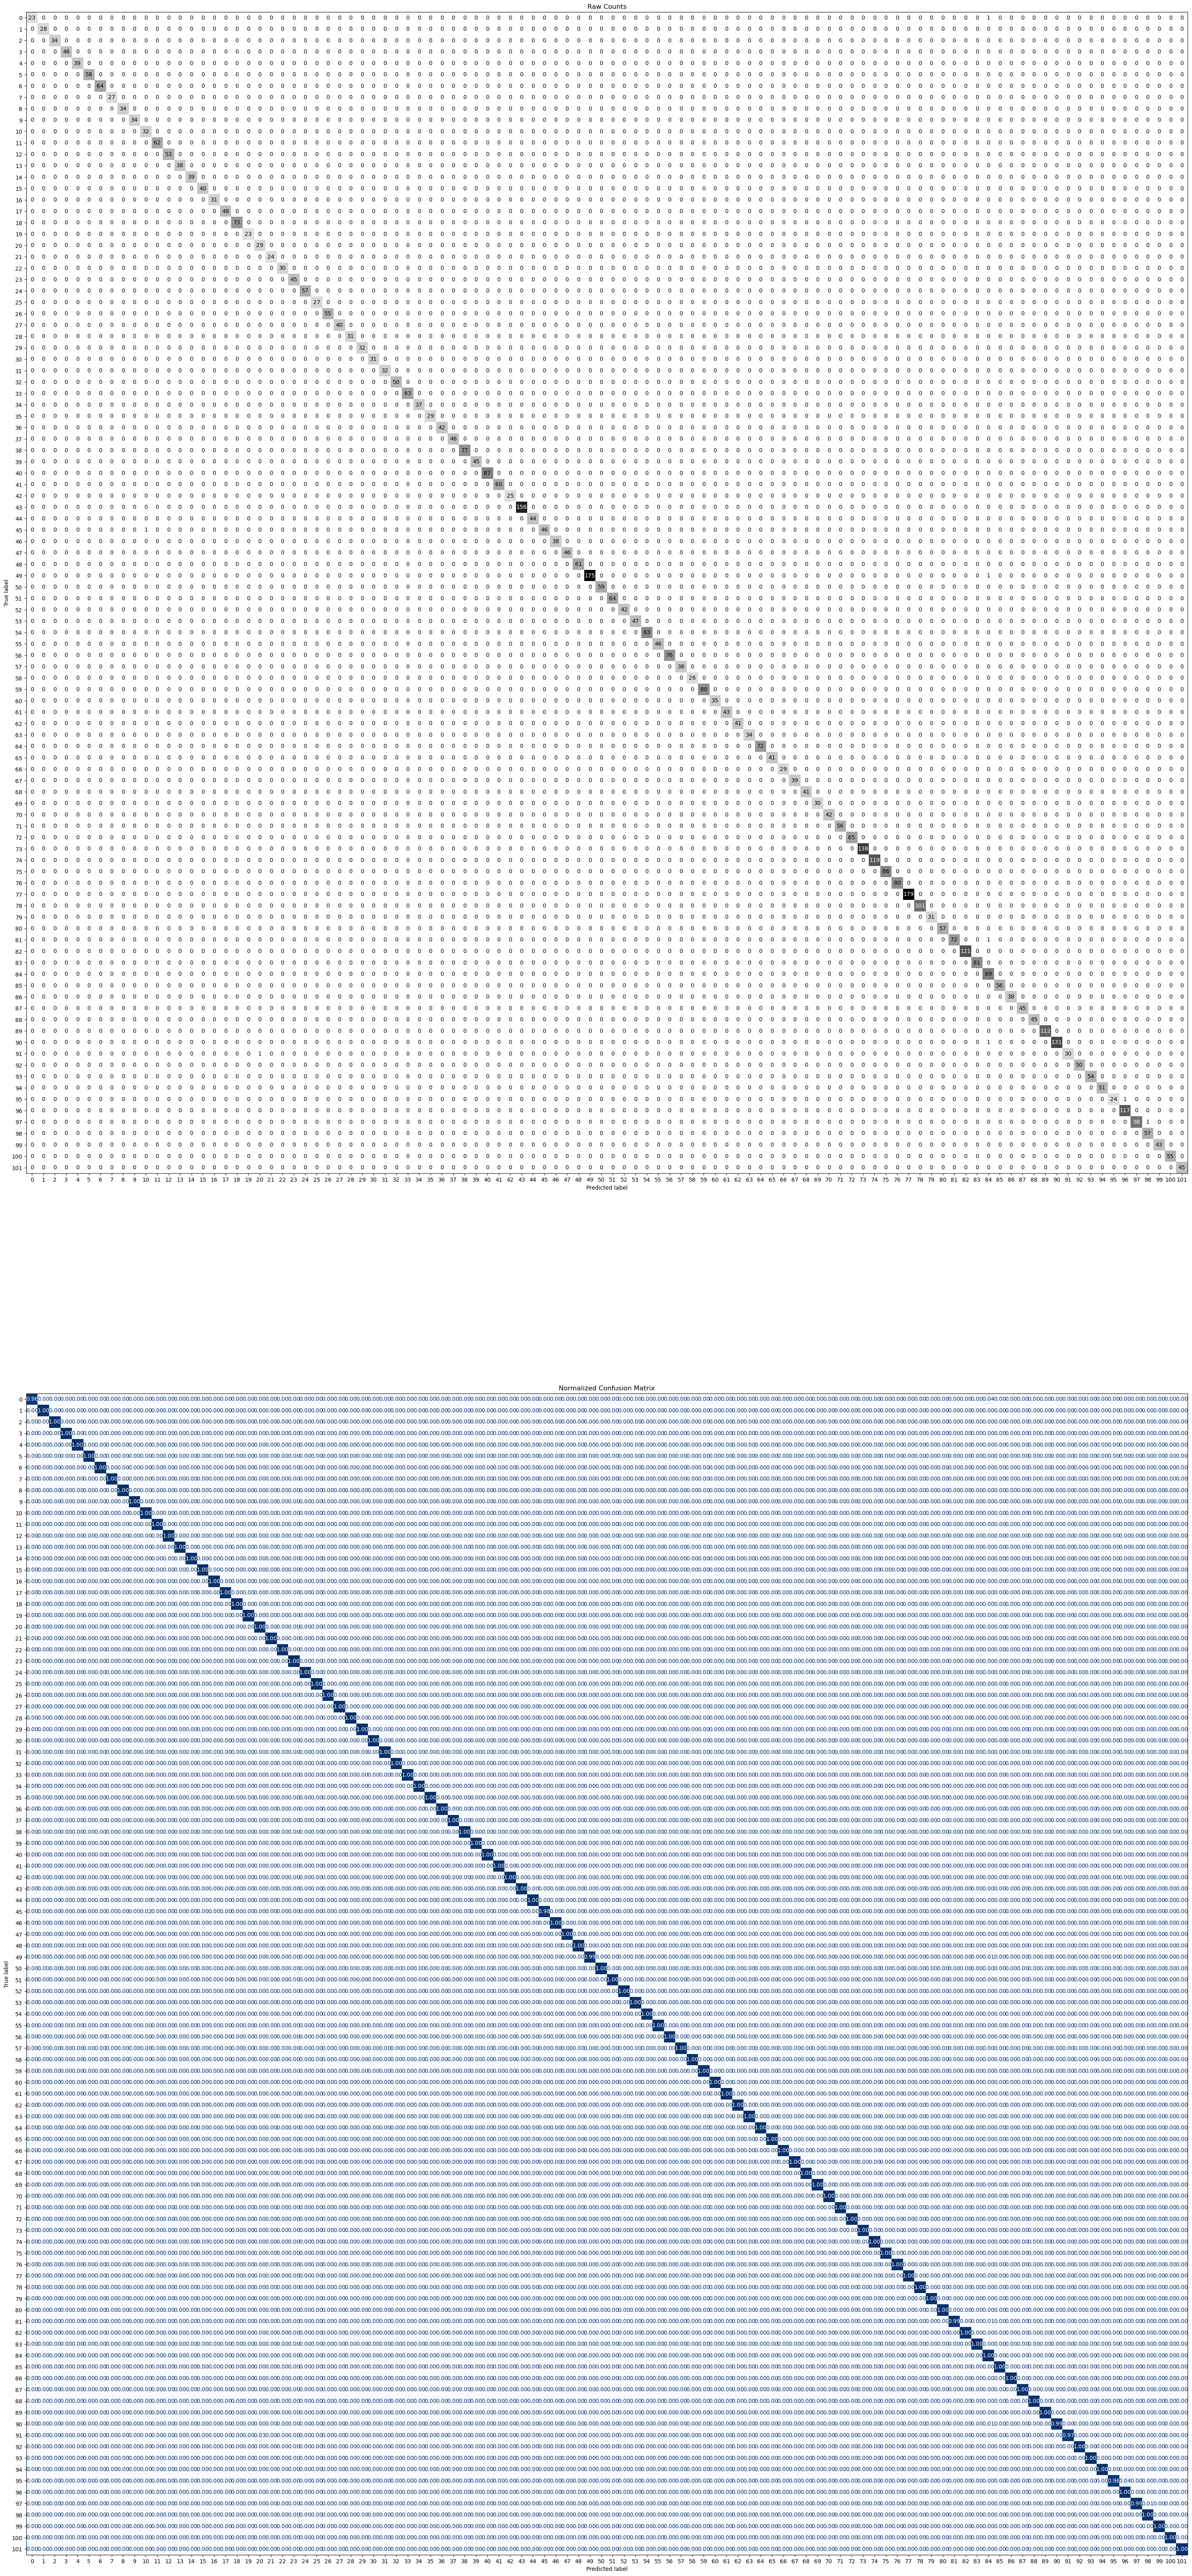


- Evaluating Training Data:
179/179 [==============================] - 291s 2s/step - loss: 0.0095 - accuracy: 0.9986
{'loss': 0.009521191008388996, 'accuracy': 0.998603343963623}


C:\Users\yupfj\anaconda3\envs\dojo-env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yupfj\anaconda3\envs\dojo-env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yupfj\anaconda3\envs\dojo-env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         8
           3       0.00      0.00      0.00         2
           4       0.75      1.00      0.86         3
           5       0.58      0.78      0.67         9
           6       0.71      0.91      0.80        11
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00         6
           9       0.62      1.00      0.77         5
          10       0.75      1.00      0.86         3
          11       1.00      1.00      1.00         6
          12       0.62      0.56      0.59         9
          13       0.50      0.67      0.57         3
          14

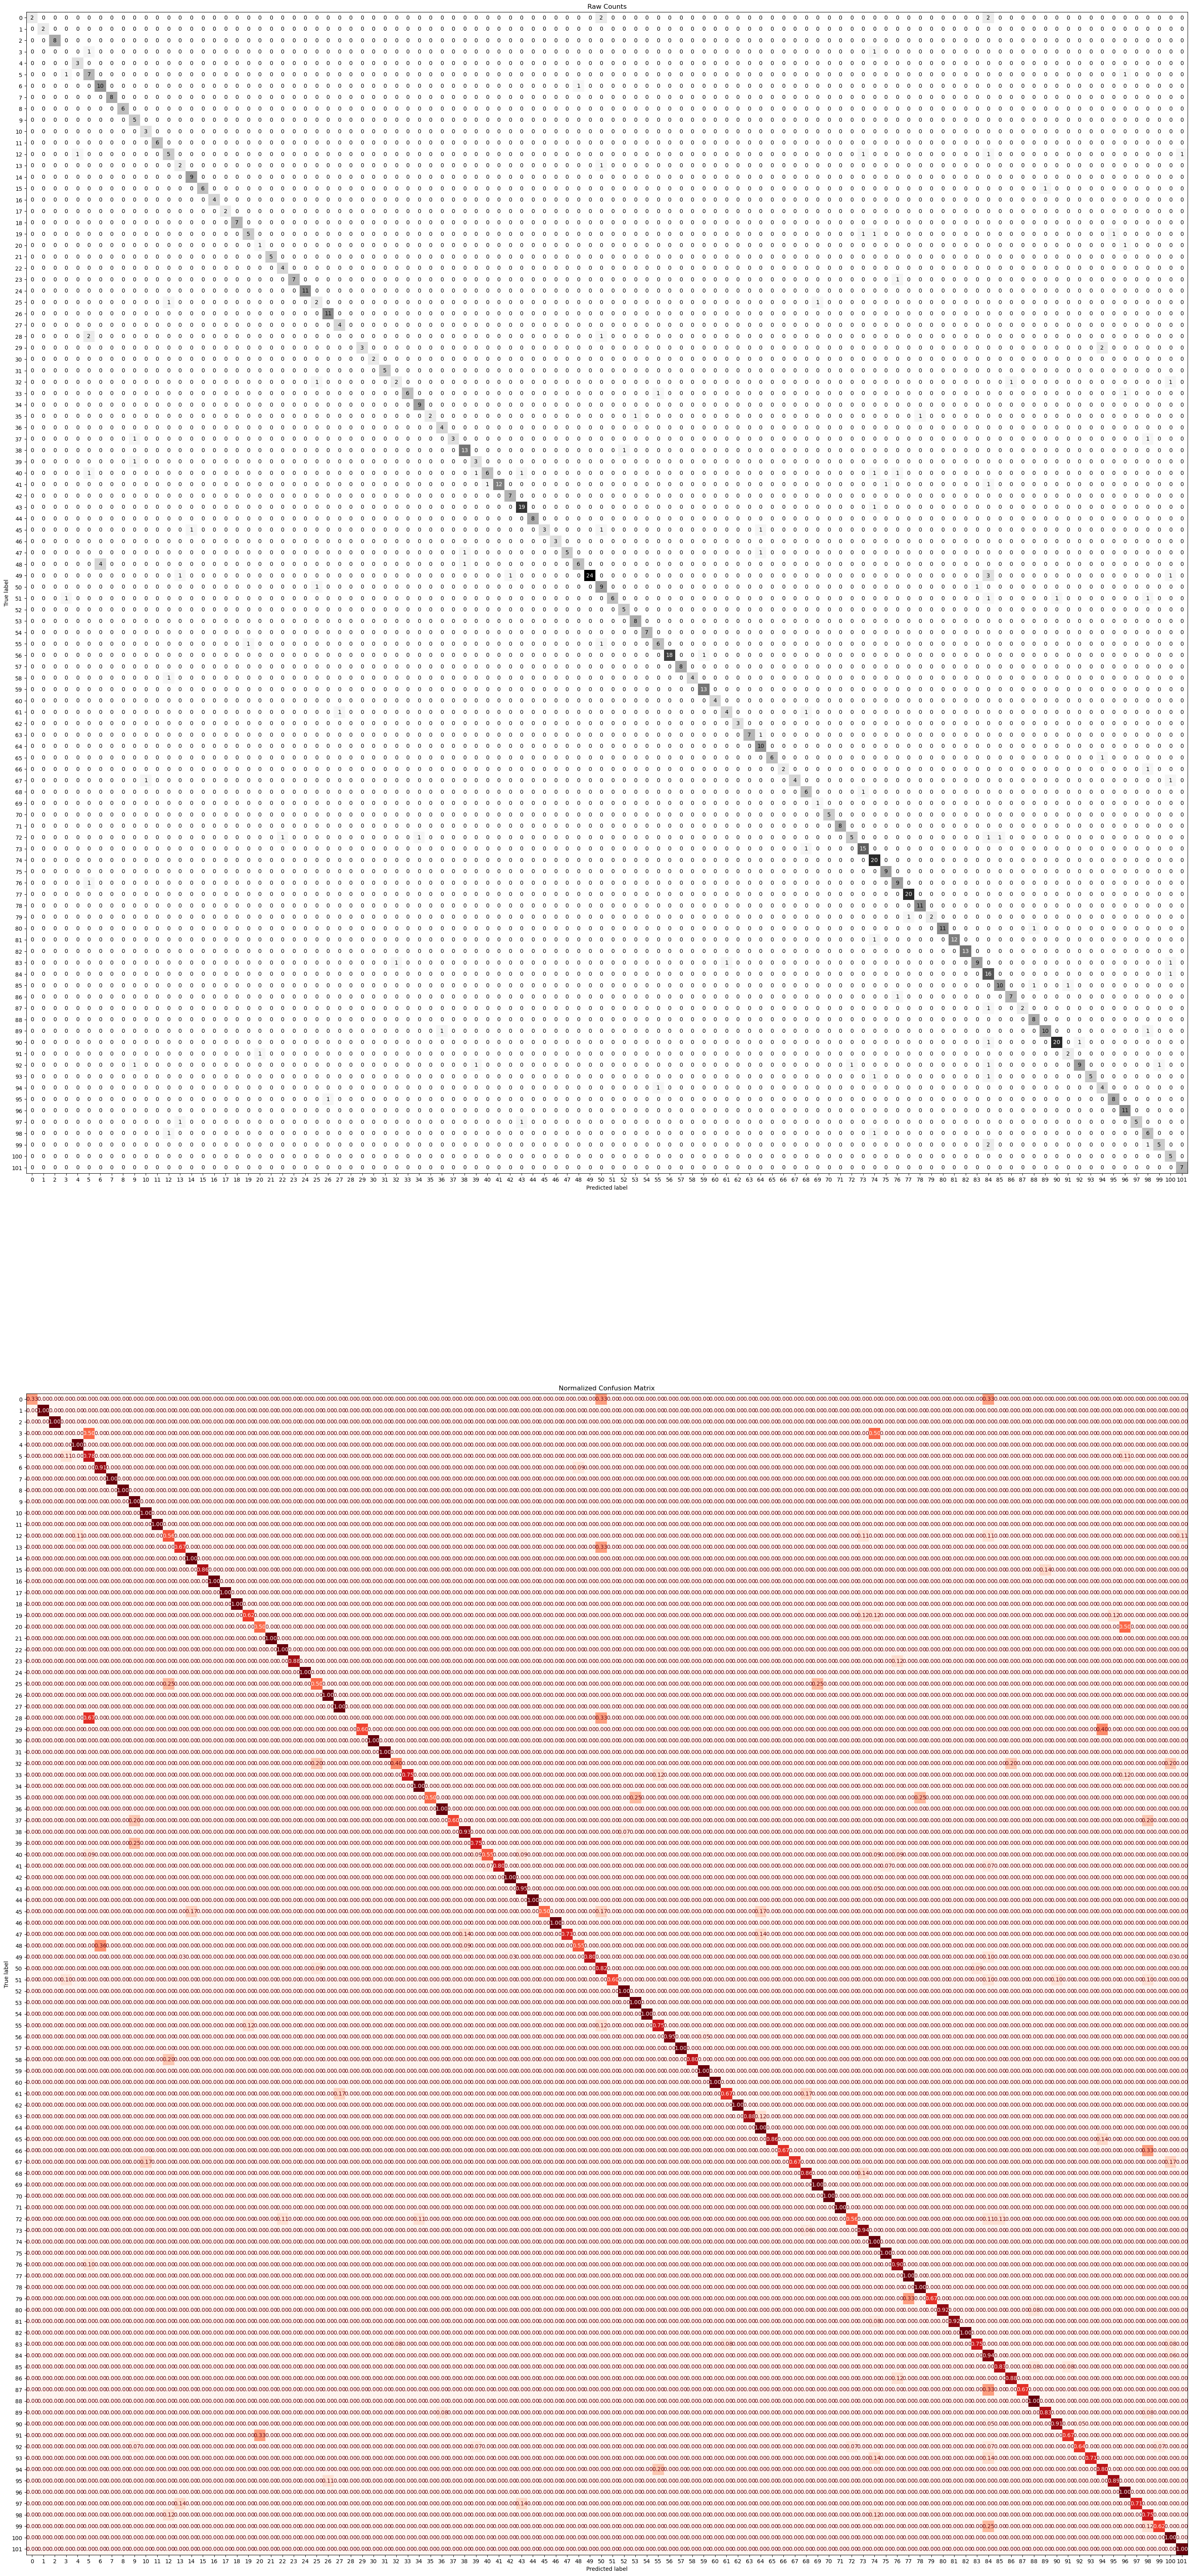

C:\Users\yupfj\anaconda3\envs\dojo-env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yupfj\anaconda3\envs\dojo-env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yupfj\anaconda3\envs\dojo-env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



- Evaluating Test Data:
26/26 [==============================] - 35s 1s/step - loss: 0.5352 - accuracy: 0.8565
{'loss': 0.5352231860160828, 'accuracy': 0.856453537940979}


In [52]:
# Evalute the best model with the custom evaluation function
evaluate_classification_network(best_model, X_train=train_ds, X_test=test_ds, history=history, figsize=(30,70));

# We observe that our tuned model achieved an accuracy of 86%. The tuning appears to be ineffective, and further improvements are necessary. Potential strategies include:

Utilize LIME to perform local explanations for mislabeled image , where accuracy is below 0.6. This can help identify and rectify model misclassifications.

Conduct further tuning by exploring different hyperparameter values and optimizing other parameters such as the choice of optimizer and L1/L2 regularizat.ons.

Experiment with alternative pretrained models such as VGG19, InceptionV3, etc., to assess if a different architecture could better suit the problem.

Enhance dataset diversity by adding an augmentation layer to the training pipeline.

Introduce 1-2 additionafter Resnet part to increase pincrease the network complexity.

Try the presegmented dataset to assess whether semantic segmentation helps to improved classification. the data.

In [98]:
# Try the second-best hyperparameters, build a model from there.
display(tuner_hb.get_best_hyperparameters(num_trials=3)[1].values)

tuner_hbb = tuner_hb.get_best_hyperparameters(num_trials=3)[1]
next_model = tuner_hb.hypermodel.build(tuner_hbb)

{'dropout_value1': 0.1,
 'dropout_value2': 0.2,
 'tuner/epochs': 10,
 'tuner/initial_epoch': 4,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '0012'}

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 preprocess_input (Lambda)   (None, 128, 128, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d_3   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_6 (Dropout)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               524544    
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                      

In [99]:
history = next_model.fit(
                   train_ds, validation_data=val_ds, epochs=40,
                    callbacks= callbacks.EarlyStopping(patience=3, monitor='val_accuracy'))

Epoch 1/40
179/179 [==============================] - 273s 2s/step - loss: 2.4120 - accuracy: 0.4488 - val_loss: 1.0786 - val_accuracy: 0.7279
Epoch 2/40
179/179 [==============================] - 280s 2s/step - loss: 0.8577 - accuracy: 0.7601 - val_loss: 0.7186 - val_accuracy: 0.8082
Epoch 3/40
179/179 [==============================] - 275s 2s/step - loss: 0.5187 - accuracy: 0.8509 - val_loss: 0.6172 - val_accuracy: 0.8346
Epoch 4/40
179/179 [==============================] - 275s 2s/step - loss: 0.3649 - accuracy: 0.8956 - val_loss: 0.5654 - val_accuracy: 0.8438
Epoch 5/40
179/179 [==============================] - 282s 2s/step - loss: 0.2654 - accuracy: 0.9235 - val_loss: 0.5407 - val_accuracy: 0.8517
Epoch 6/40
179/179 [==============================] - 265s 1s/step - loss: 0.2259 - accuracy: 0.9307 - val_loss: 0.5567 - val_accuracy: 0.8566
Epoch 7/40
179/179 [==============================] - 275s 2s/step - loss: 0.1728 - accuracy: 0.9515 - val_loss: 0.4984 - val_accuracy: 0.8683

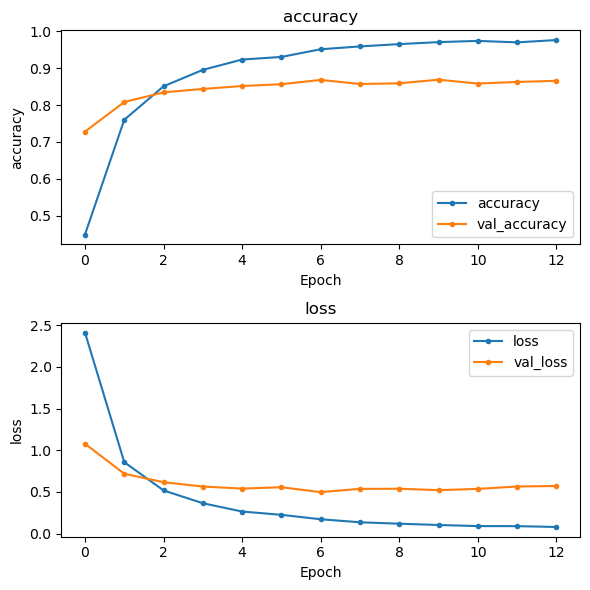


- Evaluating Network...
----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        46
           4       1.00      1.00      1.00        39
           5       1.00      1.00      1.00        58
           6       1.00      1.00      1.00        64
           7       1.00      1.00      1.00        27
           8       1.00      1.00      1.00        34
           9       1.00      1.00      1.00        34
          10       0.97      1.00      0.98        32
          11       1.00      1.00      1.00        62
          12       1.00      1.00      1.00        53
          13       1.00      1.00    

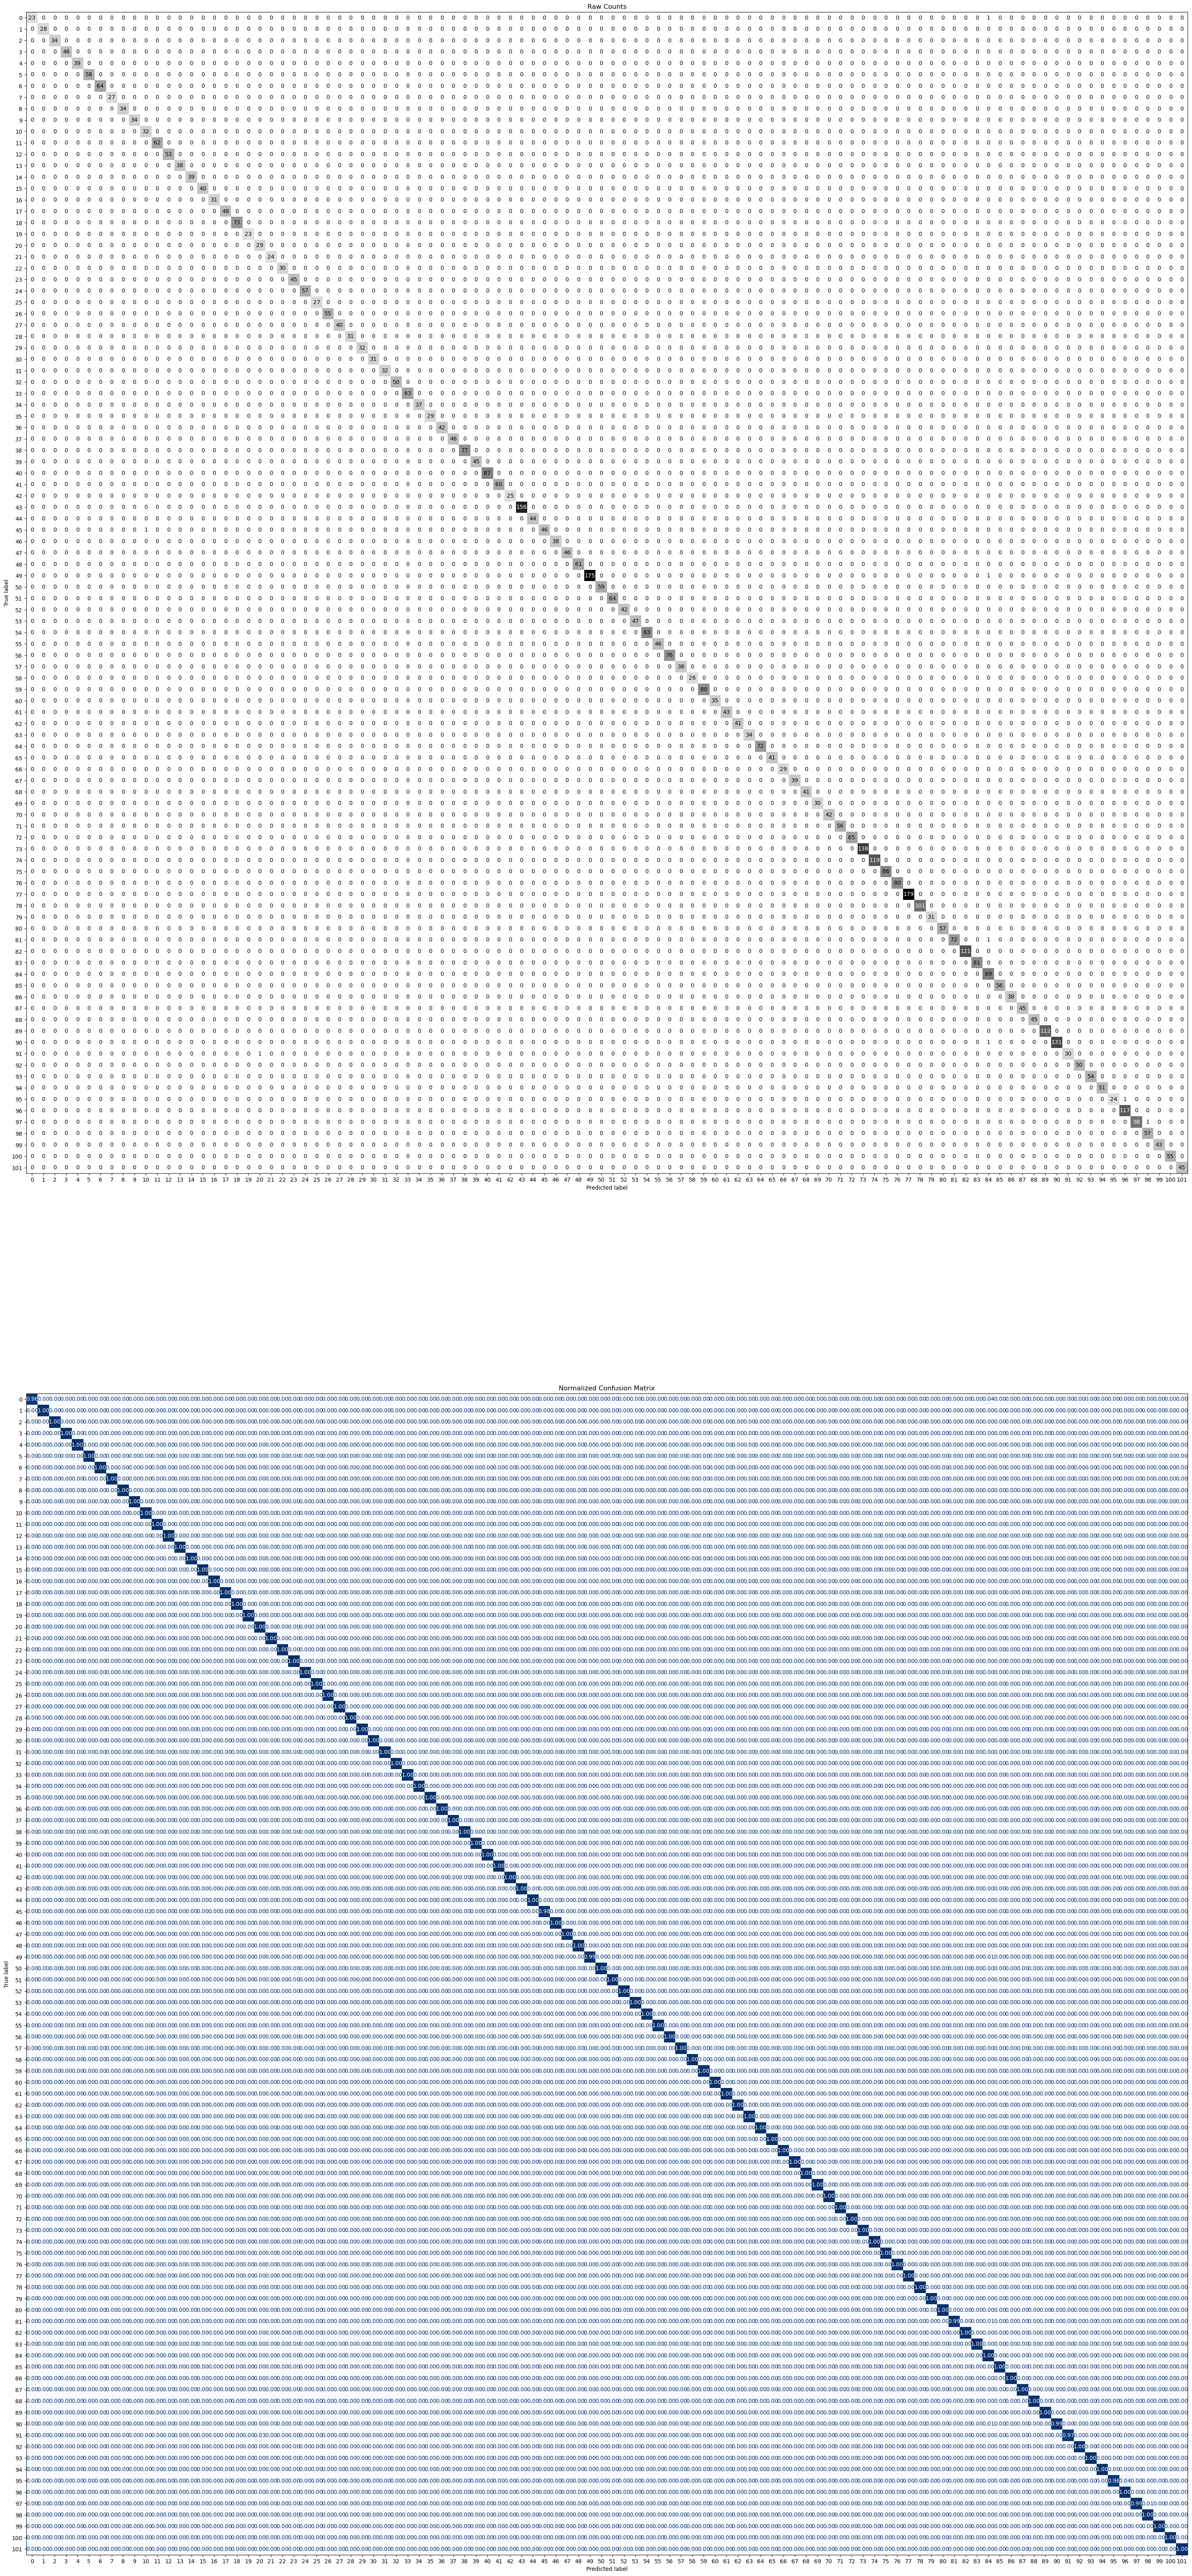


- Evaluating Training Data:
179/179 [==============================] - 200s 1s/step - loss: 0.0095 - accuracy: 0.9986
{'loss': 0.009521192871034145, 'accuracy': 0.998603343963623}


C:\Users\yupfj\anaconda3\envs\dojo-env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yupfj\anaconda3\envs\dojo-env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yupfj\anaconda3\envs\dojo-env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         8
           3       0.00      0.00      0.00         2
           4       0.75      1.00      0.86         3
           5       0.58      0.78      0.67         9
           6       0.71      0.91      0.80        11
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00         6
           9       0.62      1.00      0.77         5
          10       0.75      1.00      0.86         3
          11       1.00      1.00      1.00         6
          12       0.62      0.56      0.59         9
          13       0.50      0.67      0.57         3
          14

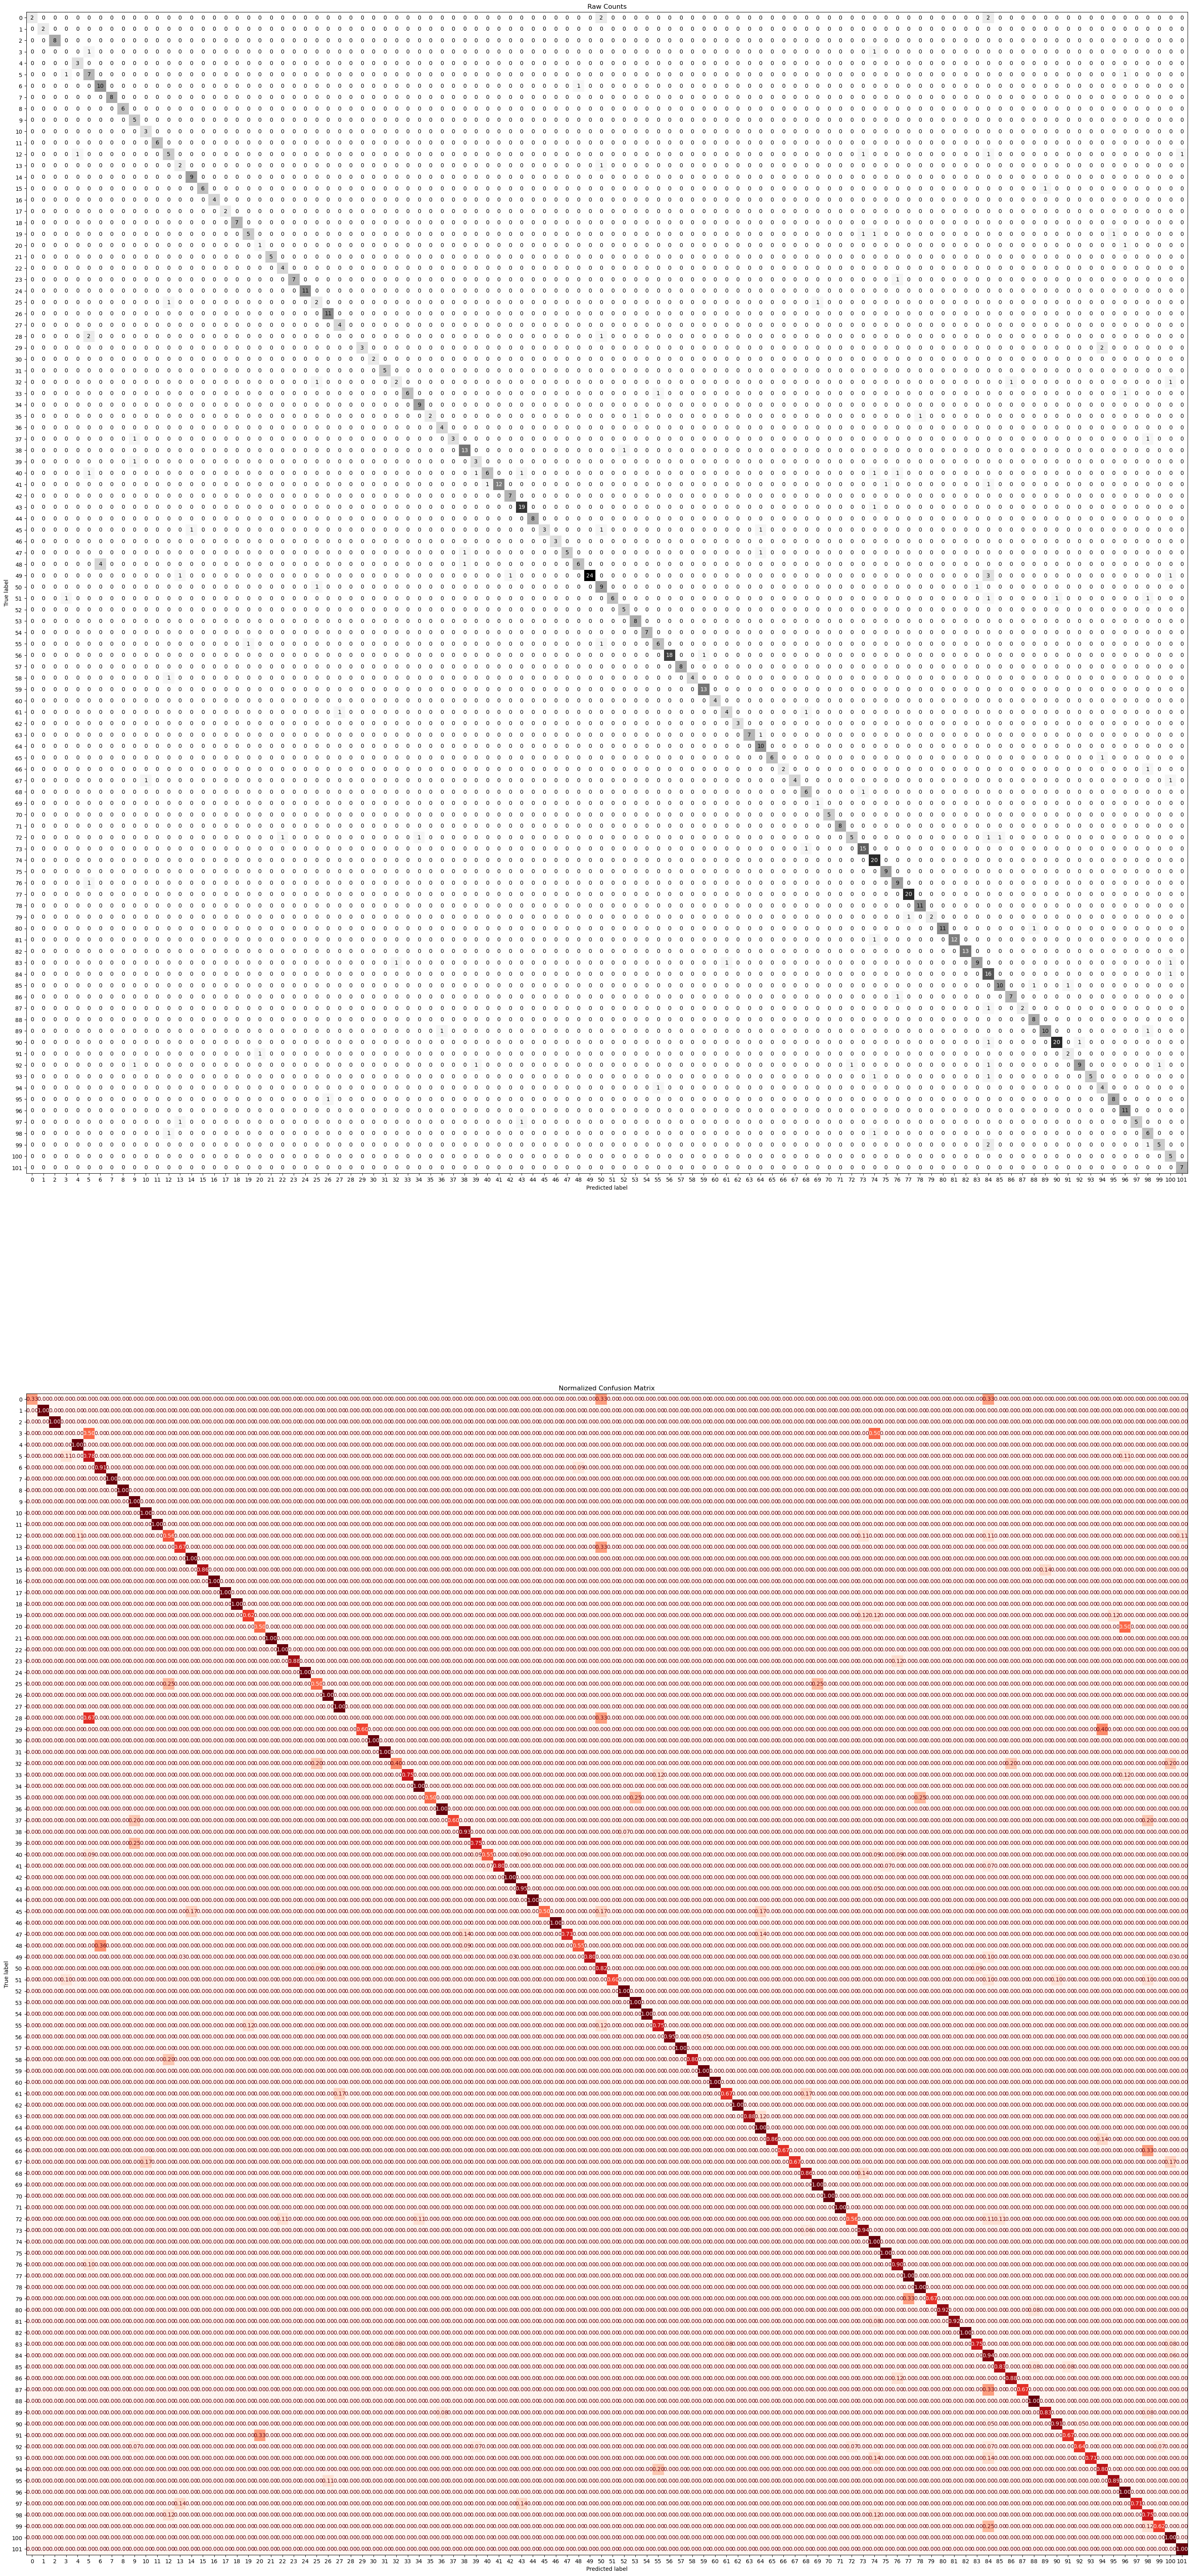

C:\Users\yupfj\anaconda3\envs\dojo-env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yupfj\anaconda3\envs\dojo-env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yupfj\anaconda3\envs\dojo-env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



- Evaluating Test Data:
26/26 [==============================] - 31s 1s/step - loss: 0.5352 - accuracy: 0.8565
{'loss': 0.5352231860160828, 'accuracy': 0.856453537940979}


In [100]:
# Evalute the best model with the custom evaluation function
evaluate_classification_network(best_model, X_train=train_ds, X_test=test_ds, history=history, figsize=(30,70));